In [2]:
!apt-get install build-essential
!pip install --upgrade pip setuptools wheel

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [1]:
!pip install pybind11

In [2]:
!pip install wisardpkg

  Preparing metadata (setup.py) ... done
  Created wheel for wisardpkg: filename=wisardpkg-1.6.3-cp310-cp310-linux_x86_64.whl size=3343185 sha256=4c271d67e1957254be33bf48ecff78800eefababfc8ec004748f7b99255fc210
  Stored in directory: /root/.cache/pip/wheels/70/a2/77/f9bafc243ca6ab4208a612d438374f3e6170563f1edeae671d
Successfully built wisardpkg


Testando Outras Possibilidades - Inicio

TESTE COM K-FOLD

Depression
0    11554
1    16326
dtype: int64
Tamanho balanceado de X_train: 26172, y_train: 26172
Tamanho balanceado de X_train: 26194, y_train: 26194
Tamanho balanceado de X_train: 26168, y_train: 26168
Tamanho balanceado de X_train: 26118, y_train: 26118
Tamanho balanceado de X_train: 25956, y_train: 25956


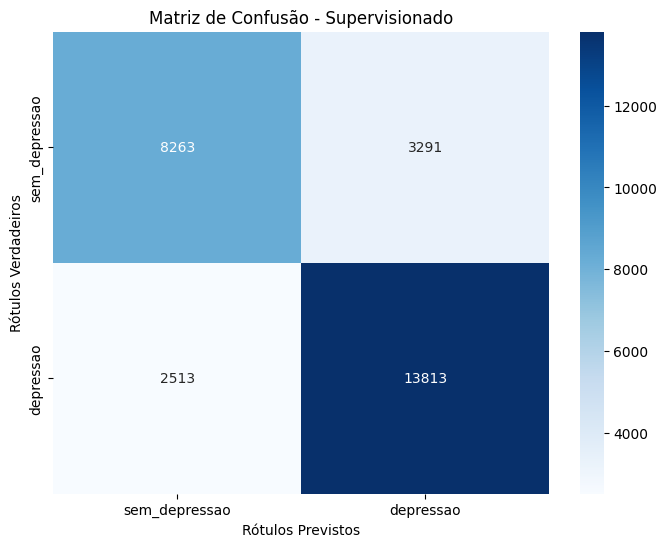

Relatório de Classificação Supervisionado:
                precision    recall  f1-score   support

sem_depressao       0.81      0.85      0.83     16326
    depressao       0.77      0.72      0.74     11554

     accuracy                           0.79     27880
    macro avg       0.79      0.78      0.78     27880
 weighted avg       0.79      0.79      0.79     27880


Análise salva em 'cluster_analysis_results_separated.xlsx'


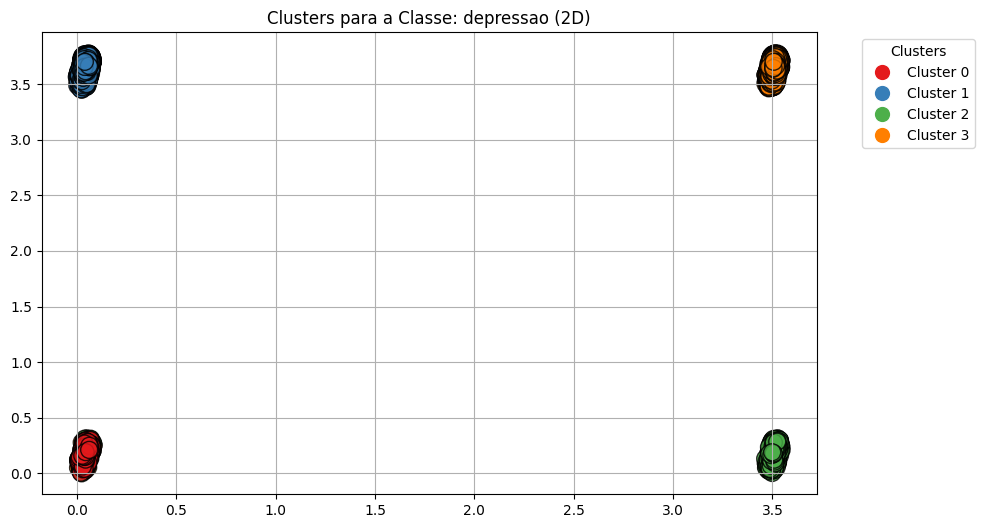

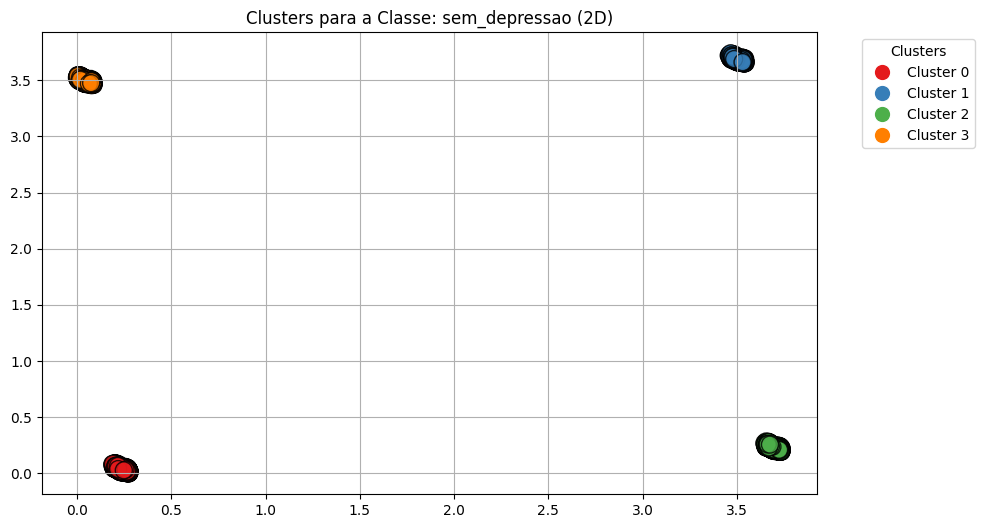

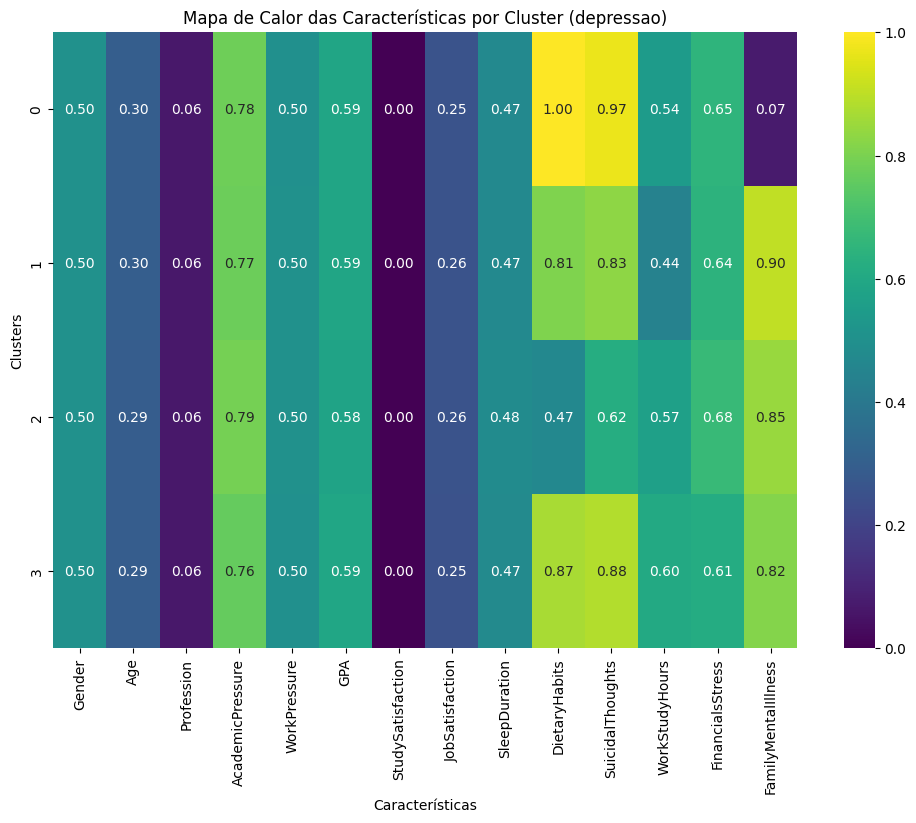

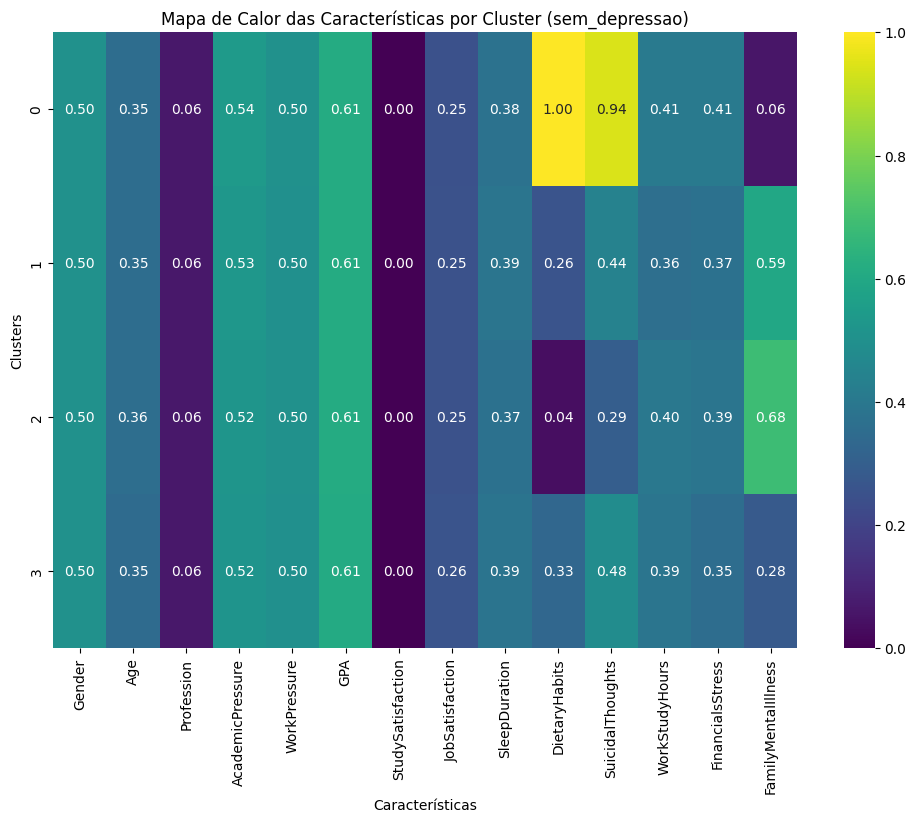

In [4]:
"""Treino da ClusWisard com UNSUPERVISED"""
import pandas as pd
import wisardpkg as wp
from wisardpkg import ClusWisard
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from encoders import process_input, ThermometerEncoder, CodeWord
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import warnings
from sklearn.utils import shuffle # Import the shuffle function

# Filtrar warnings de futuros relacionados ao scikit-learn
warnings.filterwarnings("ignore", category=FutureWarning)

def save_results_to_excel(results, output_file="cluswisard_results.xlsx"):
    """
    Salva os resultados em um arquivo Excel.
    Args:
        results (DataFrame): DataFrame contendo os resultados do modelo.
        output_file (str): Caminho do arquivo Excel de saída.
    """
    try:
        results.to_excel(output_file, index=False)
        print(f"Resultados salvos com sucesso em: {output_file}")
    except Exception as e:
        print(f"Erro ao salvar os resultados: {e}")

def binarize_column(column_name, value):
    #Função para realizar a binarização de acordo com o valor da coluna.
    if column_name == "Gender":
        return "10" if value == "Male" else "01"
    elif column_name == "Age":
        thermometer = ThermometerEncoder(minimum=18, maximum=59, resolution=4)
        encoded_value = thermometer.encode(value)  # Realiza a codificação
        return ''.join(map(str, encoded_value))  # Converte a lista ou array em uma única string
    elif column_name == "Profession":
        if value == "Architect":
            return "1000000000000000"
        elif value == "Chef":
            return "0100000000000000"
        elif value == "Civil Engineer":
            return "0010000000000000"
        elif value == "Content Writer":
            return "0001000000000000"
        elif value == "Civil Engineer":
            return "0000100000000000"
        elif value == "Digital Marketer":
            return "0000010000000000"
        elif value == "Doctor":
            return "0000001000000000"
        elif value == "Civil Engineer":
            return "0000000100000000"
        elif value == "Educational Consultant":
            return "0000000010000000"
        elif value == "Entrepreneur":
            return "0000000001000000"
        elif value == "Lawyer":
            return "0000000000100000"
        elif value == "Manager":
            return "0000000000010000"
        elif value == "Pharmacist":
            return "0000000000001000"
        elif value == "Student":
            return "0000000000000100"
        elif value == "Teacher":
            return "0000000000000010"
        elif value == "UX/UI Designer":
            return "0000000000000001"
    elif column_name == "AcademicPressure":
        thermometer = ThermometerEncoder(minimum=0.0, maximum=5.0, resolution=8)
        encoded_value = thermometer.encode(value)  # Realiza a codificação
        return ''.join(map(str, encoded_value))
    elif column_name == "WorkPressure":
        thermometer = ThermometerEncoder(minimum=0.0, maximum=5.0, resolution=4)
        encoded_value = thermometer.encode(value)  # Realiza a codificação
        return ''.join(map(str, encoded_value))  # Converte a lista ou array em uma única string
    elif column_name == "GPA":
        thermometer = ThermometerEncoder(minimum=0.0, maximum=10.0, resolution=8)
        encoded_value = thermometer.encode(value)  # Realiza a codificação
        return ''.join(map(str, encoded_value))
    elif column_name == "StudySatisfaction":
        thermometer = ThermometerEncoder(minimum=0.0, maximum=5.0, resolution=3)
        encoded_value = thermometer.encode(value)  # Realiza a codificação
        return ''.join(map(str, encoded_value))  # Converte a lista ou array em uma única string
    elif column_name == "JobSatisfaction":
        thermometer = ThermometerEncoder(minimum=0.0, maximum=4.0, resolution=8)
        encoded_value = thermometer.encode(value)  # Realiza a codificação
        return ''.join(map(str, encoded_value))  # Converte a lista ou array em uma única string
    elif column_name == "SleepDuration":
        if value == "5-6 hours":
            return "0100"  # Menor ênfase
        elif value == "Less than 5 hours":
            return "1110"  # Maior ênfase para pouco sono
        elif value == "7-8 hours":
            return "0010"  # Menor ênfase (normal)
        elif value == "More than 8 hours":
            return "0111"  # Maior ênfase para muito sono
    elif column_name == "DietaryHabits":
        if value == "Healthy":
            return "0100"
        elif value == "Unhealthy":
            return "1110"
        elif value == "Moderate":
            return "0010"
        elif value == "Others":
            return "0001"
    elif column_name == "SuicidalThoughts":
        if value == "Yes":
            return "111111111111"
        elif value == "No":
            return "000000000000"
    elif column_name == "WorkStudyHours":
        thermometer = ThermometerEncoder(minimum=0.0, maximum=12.0, resolution=10)
        encoded_value = thermometer.encode(value)  # Realiza a codificação
        return ''.join(map(str, encoded_value))
    elif column_name == "FinancialsStress":
        thermometer = ThermometerEncoder(minimum=1.0, maximum=5.0, resolution=8)
        encoded_value = thermometer.encode(value)  # Realiza a codificação
        return ''.join(map(str, encoded_value))  # Converte a lista ou array em uma única string
    elif column_name == "FamilyMentalIllness":
        if str(value) == "Yes":
            return "111111111111"
        elif str(value) == "No":
            return "000000000000"

train_data = []  # Lista para armazenar os dados binarizados
train_labels = [] # Lista para armazenar os rótulos dos dados

def binarize_dataset_to_list_treino(excel_file):
    """
    Lê um arquivo .csv, binariza cada linha e salva em um novo arquivo.
    """
    # Colunas que queremos processar
    columns_to_process = [
        "Gender", "Age", "Profession", "AcademicPressure", "WorkPressure", "GPA",
        "StudySatisfaction", "JobSatisfaction", "SleepDuration", "DietaryHabits",
        "SuicidalThoughts", "WorkStudyHours", "FinancialsStress", "FamilyMentalIllness"
    ]

    # Lendo o arquivo de entrada
    df = pd.read_excel(excel_file)
    # Verifica a distribuição das classes
    print(df. groupby( 'Depression') .size ())

    # Processando as linhas
    binary_representations = []
    for _, row in df.iterrows():
        binary_representation = ""
        for column in columns_to_process:
            binary_representation += binarize_column(column, row[column])
        train_data.append(list(map(int, binary_representation)))
        train_labels.append("depressao" if row["Depression"] == 1 else "sem_depressao")  # Adiciona rótulo em formato de strings

    return train_data, train_labels

def train_and_evaluate_supervised(data, labels, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    all_true_labels = []
    all_predicted_labels = []

    for fold, (train_index, test_index) in enumerate(kf.split(data), start=1):
        #print(f"\n[Fold {fold}]")

        # Divisão dos dados
        X_train = [data[i] for i in train_index]
        y_train = [labels[i] for i in train_index]
        X_test = [data[i] for i in test_index]
        y_test = [labels[i] for i in test_index]

        # Aplicação do SMOTE para oversampling
        smote = SMOTE(random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

        # Logs para depuração
        print(f"Tamanho balanceado de X_train: {len(X_train_balanced)}, y_train: {len(y_train_balanced)}")

        clus = ClusWisard(8, 0.7, 500, 4, verbose=True)
        clus.train(X_train, y_train)

        # Classificação supervisionada
        predicted_labels = []
        for x in X_test:
            predicted_label = clus.classify([x])
            predicted_labels.append(predicted_label)

        all_true_labels.extend(y_test)
        all_predicted_labels.extend(predicted_labels)

    return all_true_labels, all_predicted_labels

def train_and_evaluate_unsupervised(data, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    all_clusters = []
    all_test_data = []

    for fold, (train_index, test_index) in enumerate(kf.split(data), start=1):
        # Divisão dos dados
        X_train = [data[i] for i in train_index]
        X_test = [data[i] for i in test_index]

        clus = ClusWisard(8, 0.7, 500, 4, verbose=True)
        clus.trainUnsupervised(X_train)

        # Classificação não supervisionada
        clusters = [clus.classifyUnsupervised([x])[0] for x in X_test]

        all_clusters.extend(clusters)
        all_test_data.extend(X_test)

    return all_test_data, all_clusters

def evaluate_supervised(true_labels, predicted_labels):
    # Matriz de Confusão
    cm = confusion_matrix(true_labels, predicted_labels, labels=["sem_depressao", "depressao"])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["sem_depressao", "depressao"],
                yticklabels=["sem_depressao", "depressao"])
    plt.xlabel("Rótulos Previstos")
    plt.ylabel("Rótulos Verdadeiros")
    plt.title("Matriz de Confusão - Supervisionado")
    plt.show()

    # Relatório de Classificação
    report = classification_report(true_labels, predicted_labels, target_names=["sem_depressao", "depressao"])
    print("Relatório de Classificação Supervisionado:\n", report)

def plot_clusters_by_class_2d(test_data, clusters, true_labels, class_name):
    """
    Plota os clusters para uma classe específica (depressao ou sem_depressao) em 2D.

    Args:
        test_data (array-like): Dados originais testados.
        clusters (array-like): Clusters atribuídos pelo modelo.
        true_labels (array-like): Rótulos verdadeiros das classes.
        class_name (str): Nome da classe ("depressao" ou "sem_depressao").
    """
    # Filtrar os dados pela classe
    filtered_data = [
        test_data[i]
        for i in range(len(true_labels))
        if true_labels[i] == class_name
    ]
    filtered_clusters = [
        clusters[i]
        for i in range(len(true_labels))
        if true_labels[i] == class_name
    ]

    # Reduzir dimensionalidade com PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(filtered_data)

    # Ajustar os valores para que não sejam negativos
    reduced_data -= reduced_data.min(axis=0)

    # Garantir que os clusters são numéricos
    cluster_values = pd.factorize(filtered_clusters)[0]

    # Definir um conjunto de cores mais variado para os clusters
    colors = ['#e41a1c', '#377eb8', '#4daf4a', '#ff7f00']
    cmap = ListedColormap(colors[:len(np.unique(cluster_values))])

    # Criar o scatter plot com tamanhos de pontos aumentados
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        reduced_data[:, 0],
        reduced_data[:, 1],
        c=cluster_values, cmap=cmap, alpha=0.8, edgecolor='k', s=150  # Tamanho aumentado (s=150)
    )

    # Personalizar a legenda com apenas os números dos clusters
    legend_elements = [
        plt.Line2D(
            [0], [0], marker='o', color='w', label=f"Cluster {key}",
            markerfacecolor=cmap(key), markersize=12
        )
        for key in range(len(np.unique(cluster_values)))
    ]
    plt.legend(handles=legend_elements, title="Clusters", loc='upper left', bbox_to_anchor=(1.05, 1))

    # Configurações do gráfico
    plt.title(f"Clusters para a Classe: {class_name} (2D)")
    #plt.xlabel("Componente Principal 1")
    #plt.ylabel("Componente Principal 2")
    plt.grid(True)
    plt.show()



# Função para reconstruir as colunas originais a partir dos dados binarizados
def reconstruct_original_columns(data, binarization_sizes):
    """
    Reconstrói as colunas originais a partir dos dados binarizados.
    """
    original_data = pd.DataFrame()
    start = 0
    for column, size in binarization_sizes.items():
        end = start + size
        # Extrair valores binarizados e calcular a média para reconstrução
        original_data[column] = data.iloc[:, 0].apply(
            lambda x: np.mean(x[start:end]) if isinstance(x, (list, np.ndarray)) else np.mean(eval(x)[start:end])
        )
        start = end
    return original_data

# Configuração das colunas binarizadas e seus tamanhos
binarization_sizes = {
    "Gender": 2,
    "Age": 4,
    "Profession": 16,
    "AcademicPressure": 8,
    "WorkPressure": 8,
    "GPA": 8,
    "StudySatisfaction": 3,
    "JobSatisfaction": 8,
    "SleepDuration": 4,
    "DietaryHabits": 4,
    "SuicidalThoughts": 12,
    "WorkStudyHours": 6,
    "FinancialsStress": 8,
    "FamilyMentalIllness": 10,
}

def plot_heatmap_by_class(test_data, clusters, true_labels, binarization_sizes):
    """
    Plota mapas de calor separados por classes ('depressao' e 'sem_depressao').

    Args:
        test_data (array-like): Dados originais testados (binarizados).
        clusters (array-like): Clusters atribuídos pelo modelo.
        true_labels (array-like): Classes reais ('depressao' ou 'sem_depressao').
        binarization_sizes (dict): Dicionário com os tamanhos de binarização de cada característica.
    """
    # Criar um DataFrame com os dados binarizados, clusters e rótulos
    df = pd.DataFrame(test_data, dtype=int)  # Ensure the columns are initially numeric by specifying dtype
    df['Cluster'] = clusters
    df['Class'] = true_labels

    # Inicializar o DataFrame com os valores agregados
    aggregated_features = pd.DataFrame()

    # Iterar sobre as colunas originais e agregar valores
    start = 0
    for col, size in binarization_sizes.items():
        end = start + size
        # Calcular a média das dimensões binarizadas para cada característica
        aggregated_features[col] = df.iloc[:, start:end].mean(axis=1)  # The mean is already float-type
        start = end

    # Adicionar as colunas de clusters e classes
    aggregated_features['Cluster'] = clusters
    aggregated_features['Class'] = true_labels

    # Filtrar os dados por classe
    for class_label in ['depressao', 'sem_depressao']:
        class_data = aggregated_features[aggregated_features['Class'] == class_label]

        # Calcular a média agregada por cluster, convertendo para numérico se necessário
        cluster_means = class_data.groupby('Cluster').agg(
            {col: 'mean' for col in binarization_sizes}  # Specify aggregation for each feature column
        ).drop(columns=['Class'], errors='ignore')  # Ignore if 'Class' isn't present

        # Converter para numérico usando pd.to_numeric
        cluster_means = cluster_means.apply(pd.to_numeric, errors='coerce')

        # Plotar o heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(cluster_means, cmap="viridis", annot=True, fmt=".2f", xticklabels=cluster_means.columns)
        plt.title(f"Mapa de Calor das Características por Cluster ({class_label})")
        plt.xlabel("Características")
        plt.ylabel("Clusters")
        plt.show()

# Função para salvar a análise de clusters em um arquivo Excel
def save_cluster_analysis_to_excel_separated(test_data, clusters, true_labels, binarization_sizes, output_file="cluster_analysis_results_separated.xlsx"):
    """
    Salva a análise de clusters separada por classes em um arquivo Excel com múltiplas abas.
    """
    # Reconstruir os dados originais a partir dos binarizados
    original_data = reconstruct_original_columns(test_data, binarization_sizes)
    original_data["Cluster"] = clusters  # Adicionar os clusters ao DataFrame
    original_data["Class"] = true_labels  # Adicionar as classes originais ao DataFrame

    # Separar por classes
    depression_data = original_data[original_data["Class"] == "depressao"]
    no_depression_data = original_data[original_data["Class"] == "sem_depressao"]

    # Agrupar por cluster e calcular médias separadas para cada classe
    depression_analysis = depression_data.drop(columns=['Class']).groupby("Cluster").mean()
    no_depression_analysis = no_depression_data.drop(columns=['Class']).groupby("Cluster").mean()

    # Analisar a distribuição de tamanho por cluster para cada classe
    depression_sizes = depression_data["Cluster"].value_counts()
    no_depression_sizes = no_depression_data["Cluster"].value_counts()

    # Salvar os resultados em um arquivo Excel com múltiplas abas
    with pd.ExcelWriter(output_file) as writer:
        depression_analysis.to_excel(writer, sheet_name="Depressao Analysis")
        no_depression_analysis.to_excel(writer, sheet_name="Sem Depressao Analysis")
        depression_sizes.to_excel(writer, sheet_name="Depressao Sizes")
        no_depression_sizes.to_excel(writer, sheet_name="Sem Depressao Sizes")

    print(f"\nAnálise salva em '{output_file}'")


# Carregar e processar o dataset
excel_file = '/content/drive/MyDrive/RedesNeurais-Conteudos/TrabalhoFinal/Final_Student depression - Domingo.xlsx'
train_data, train_labels = binarize_dataset_to_list_treino(excel_file)

# Realizar validação cruzada supervisionada
true_labels_supervised, predicted_labels_supervised = train_and_evaluate_supervised(train_data, train_labels, k=5)

# Avaliar o modelo supervisionado
evaluate_supervised(true_labels_supervised, predicted_labels_supervised)

# Realizar validação cruzada não supervisionada
test_data_unsupervised, clusters_unsupervised = train_and_evaluate_unsupervised(train_data, k=5)

# Após a validação cruzada não supervisionada
test_data_unsupervised, clusters_unsupervised = train_and_evaluate_unsupervised(train_data, k=5)

# Salvar análise separada por classes e clusters
save_cluster_analysis_to_excel_separated(
    pd.DataFrame({"Test Data": test_data_unsupervised}),
    clusters_unsupervised,
    true_labels_supervised,  # Ou os rótulos reais
    binarization_sizes,
    output_file="cluster_analysis_results_separated.xlsx"
)

# Gráficos 2D
plot_clusters_by_class_2d(test_data_unsupervised, clusters_unsupervised, true_labels_supervised, "depressao")
plot_clusters_by_class_2d(test_data_unsupervised, clusters_unsupervised, true_labels_supervised, "sem_depressao")

# Gráfico Heat map
plot_heatmap_by_class(test_data_unsupervised, clusters_unsupervised, true_labels_supervised, binarization_sizes)


